Create and visualize a networkx graph

Calculate the clustering coeff for each nodes, and the average clustering coeff for each of the cluster. If any cluster with avg clustering coeff 1 (complete subgraph) or 0 (only 2 nodes), they will be removed since there is no link between these cluster with the rest ones (probably not helpful)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

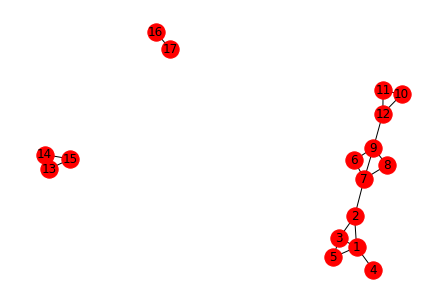

In [2]:
G = nx.Graph()
G.add_edges_from([[1,2],[2,3],[1,3],[1,4],[1,5],[3,5],
                  [6,7],[7,8],[8,9],[6,9],[6,9],[7,9],
                  [10,11],[11,12],[10,12],[9,12],[2,7]
                  ,[13,14],[13,15],[14,15],[16,17]])
nx.draw(G,with_labels=True,node_color='r')

In [3]:
#clustering coefficient for each nodes
nx.clustering(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0,
 5: 1.0,
 6: 1.0,
 7: 0.3333333333333333,
 8: 1.0,
 9: 0.3333333333333333,
 10: 1.0,
 11: 1.0,
 12: 0.3333333333333333,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 0,
 17: 0}

In [4]:
#calculate the betweeness centrality (just for alternative way)
edge_betweenness = nx.edge_betweenness_centrality(G).items()
sorted(edge_betweenness,key=lambda pair:-pair[1])

[((2, 7), 0.25735294117647056),
 ((9, 12), 0.19852941176470587),
 ((7, 9), 0.1764705882352941),
 ((1, 2), 0.14705882352941177),
 ((2, 3), 0.08823529411764705),
 ((1, 4), 0.08088235294117647),
 ((10, 12), 0.07352941176470588),
 ((11, 12), 0.07352941176470588),
 ((6, 7), 0.04779411764705882),
 ((7, 8), 0.04779411764705882),
 ((1, 5), 0.044117647058823525),
 ((3, 5), 0.03676470588235294),
 ((6, 9), 0.03308823529411765),
 ((8, 9), 0.03308823529411765),
 ((1, 3), 0.014705882352941176),
 ((10, 11), 0.007352941176470588),
 ((13, 14), 0.007352941176470588),
 ((13, 15), 0.007352941176470588),
 ((14, 15), 0.007352941176470588),
 ((16, 17), 0.007352941176470588)]

In [5]:
import numpy as np
import community.community_louvain as community_louvain

comms = community_louvain.best_partition(G) 
comms_count = np.unique(list(comms.values())) #number of communities

for k in range(0,len(comms_count)):
  nodes = [i for i, j in comms.items() if j ==k] #get all the nodes from a cluster
  avg_coeff=nx.average_clustering(G,nodes)  #calculate avg clustering coeff
  print('Cluster ',k,': ',nodes,': avg_coeff %2f.' %avg_coeff)
  if avg_coeff==1 or avg_coeff ==0:
    print('->Remove cluster %f'%k)
    G.remove_nodes_from(nodes)
  

Cluster  0 :  [16, 17] : avg_coeff 0.000000.
->Remove cluster 0.000000
Cluster  1 :  [10, 11, 12] : avg_coeff 0.777778.
Cluster  2 :  [6, 7, 8, 9] : avg_coeff 0.666667.
Cluster  3 :  [13, 14, 15] : avg_coeff 1.000000.
->Remove cluster 3.000000
Cluster  4 :  [1, 2, 3, 4, 5] : avg_coeff 0.466667.


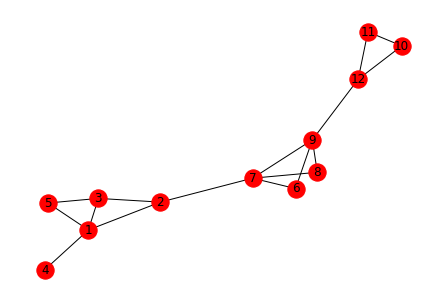

In [6]:
nx.draw(G,with_labels=True,node_color='r')